In [1]:
# Для начала подгрузим необходимые библиотеки, очистим данные и приведем таблицу в удобный вид. Аналитика начинается с 13 запроса.
import pandas as pd
import numpy as np

In [2]:
# Устанавливаем максимальное количество отображаемых колонок в 40
pd.set_option('display.max_columns',40)
# Устанавливаем формат отображения чисел с плавающей точкой до двух знаков после запятой
pd.set_option('display.float_format','{:.2f}'.format)

In [3]:
df = pd.read_csv('E:\\УЧЕБА\\АНАЛИЗ ДАННЫХ\\АНАЛИЗ НА PANDAS\\Sample_Superstore.csv', encoding='windows-1251')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [4]:
# Посмотрим какие колонки есть в таблице
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# Получим общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# Оставим только необходимые колонки
df = df.loc[:,['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Segment', 'City', 'State','Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']]
df

,Order ID,Order Date,Ship Date,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,CA-2016-152156,11/8/2016,11/11/2016,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,CA-2016-138688,6/12/2016,6/16/2016,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,US-2015-108966,10/11/2015,10/18/2015,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,US-2015-108966,10/11/2015,10/18/2015,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,1/23/2014,Tom Boeckenhauer,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10
9990,CA-2017-121258,2/26/2017,3/3/2017,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63
9991,CA-2017-121258,2/26/2017,3/3/2017,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39
9992,CA-2017-121258,2/26/2017,3/3/2017,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32


In [7]:
df['Order Date'].dtype

dtype('O')

In [8]:
# Преобразуем столбцы 'Order Date' и 'Ship Date' в формат datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df

,Order ID,Order Date,Ship Date,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,CA-2016-152156,2016-11-08,2016-11-11,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,CA-2016-138688,2016-06-12,2016-06-16,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,US-2015-108966,2015-10-11,2015-10-18,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,US-2015-108966,2015-10-11,2015-10-18,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Tom Boeckenhauer,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10
9990,CA-2017-121258,2017-02-26,2017-03-03,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63
9991,CA-2017-121258,2017-02-26,2017-03-03,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39
9992,CA-2017-121258,2017-02-26,2017-03-03,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32


In [9]:
# Сортируем DataFrame по столбцу 'Order Date' в порядке возрастания
df = df.sort_values('Order Date', ascending=True)

In [10]:
# Выводим уникальные значения из столбца 'Order Date'
df['Order Date'].unique()

<DatetimeArray>
['2014-01-03 00:00:00', '2014-01-04 00:00:00', '2014-01-05 00:00:00',
 '2014-01-06 00:00:00', '2014-01-07 00:00:00', '2014-01-09 00:00:00',
 '2014-01-10 00:00:00', '2014-01-11 00:00:00', '2014-01-13 00:00:00',
 '2014-01-14 00:00:00',
 ...
 '2017-12-21 00:00:00', '2017-12-22 00:00:00', '2017-12-23 00:00:00',
 '2017-12-24 00:00:00', '2017-12-25 00:00:00', '2017-12-26 00:00:00',
 '2017-12-27 00:00:00', '2017-12-28 00:00:00', '2017-12-29 00:00:00',
 '2017-12-30 00:00:00']
Length: 1237, dtype: datetime64[ns]

In [11]:
# Извлекаем год из столбца 'Order Date' и создаём новый столбец 'Year'
df['Year'] = df['Order Date'].dt.year
df

,Order ID,Order Date,Ship Date,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
7980,CA-2014-103800,2014-01-03,2014-01-07,Darren Powers,Consumer,Houston,Texas,Central,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,0.20,5.55,2014
739,CA-2014-112326,2014-01-04,2014-01-08,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Labels,Avery 508,11.78,3,0.20,4.27,2014
740,CA-2014-112326,2014-01-04,2014-01-08,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,0.20,-64.77,2014
741,CA-2014-112326,2014-01-04,2014-01-08,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,0.80,-5.49,2014
1759,CA-2014-141817,2014-01-05,2014-01-12,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,0.20,4.88,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,CA-2017-156720,2017-12-30,2018-01-03,Jill Matthias,Consumer,Loveland,Colorado,West,Office Supplies,Fasteners,Bagged Rubber Bands,3.02,3,0.20,-0.60,2017
908,CA-2017-143259,2017-12-30,2018-01-03,Patrick O'Donnell,Consumer,New York City,New York,East,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.78,3,0.20,19.79,2017
907,CA-2017-143259,2017-12-30,2018-01-03,Patrick O'Donnell,Consumer,New York City,New York,East,Technology,Phones,Gear Head AU3700S Headset,90.93,7,0.00,2.73,2017
1296,CA-2017-115427,2017-12-30,2018-01-03,Erica Bern,Corporate,Fairfield,California,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,0.20,4.52,2017


In [12]:
# Извлекаем месяц из столбца 'Order Date' и создаём новый столбец 'Month'
df['Month'] = df['Order Date'].dt.month
df

,Order ID,Order Date,Ship Date,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
7980,CA-2014-103800,2014-01-03,2014-01-07,Darren Powers,Consumer,Houston,Texas,Central,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,0.20,5.55,2014,1
739,CA-2014-112326,2014-01-04,2014-01-08,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Labels,Avery 508,11.78,3,0.20,4.27,2014,1
740,CA-2014-112326,2014-01-04,2014-01-08,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,0.20,-64.77,2014,1
741,CA-2014-112326,2014-01-04,2014-01-08,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,0.80,-5.49,2014,1
1759,CA-2014-141817,2014-01-05,2014-01-12,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,0.20,4.88,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,CA-2017-156720,2017-12-30,2018-01-03,Jill Matthias,Consumer,Loveland,Colorado,West,Office Supplies,Fasteners,Bagged Rubber Bands,3.02,3,0.20,-0.60,2017,12
908,CA-2017-143259,2017-12-30,2018-01-03,Patrick O'Donnell,Consumer,New York City,New York,East,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.78,3,0.20,19.79,2017,12
907,CA-2017-143259,2017-12-30,2018-01-03,Patrick O'Donnell,Consumer,New York City,New York,East,Technology,Phones,Gear Head AU3700S Headset,90.93,7,0.00,2.73,2017,12
1296,CA-2017-115427,2017-12-30,2018-01-03,Erica Bern,Corporate,Fairfield,California,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,0.20,4.52,2017,12


In [13]:
# Для начала рассмотрим рост показателей по годам. Нас интересует общая выручка, общее кол-во проданных товаров и общая прибыль.

# Группируем данные по годам и рассчитываем общие показатели: выручку, количество проданных товаров и прибыль
df1 = df.groupby(['Year']).agg({
    'Sales': 'sum',    # Общая выручка
    'Quantity': 'sum', # Общее количество проданных товаров
    'Profit': 'sum'    # Общая прибыль
}).rename(columns={
    'Sales': 'Total Sales',
    'Quantity': 'Total Quantity',
    'Profit': 'Total Profit'
})

# Создаем сдвинутые на один год столбцы для расчета динамики
df1['S_shifted'] = df1['Total Sales'].shift(1)
df1['Q_shifted'] = df1['Total Quantity'].shift(1)
df1['P_shifted'] = df1['Total Profit'].shift(1)

# Рассчитываем динамику изменений показателей в процентах
df1['Sales Dynamic'] = ((df1['Total Sales'] - df1['S_shifted']) / df1['Total Sales'])*100
df1['Quantity Dynamic'] = ((df1['Total Quantity'] - df1['Q_shifted']) / df1['Total Quantity'])*100
df1['Profit Dynamic'] = ((df1['Total Profit'] - df1['P_shifted']) / df1['Total Profit'])*100

# Формируем финальную таблицу с общими показателями и их динамикой
dynamic = df1.loc[:,['Total Sales','Sales Dynamic','Total Quantity','Quantity Dynamic','Total Profit','Profit Dynamic']]

# Заполняем пустые значения дефисом для удобства чтения
dynamic = dynamic.fillna('-')
dynamic 

,Total Sales,Sales Dynamic,Total Quantity,Quantity Dynamic,Total Profit,Profit Dynamic
Year,,,,,,
2014,484247.50,-,7581,-,49543.97,-
2015,470532.51,-2.91,7979,4.99,61618.60,19.60
2016,609205.60,22.76,9837,18.89,81795.17,24.67
2017,733215.26,16.91,12476,21.15,93439.27,12.46


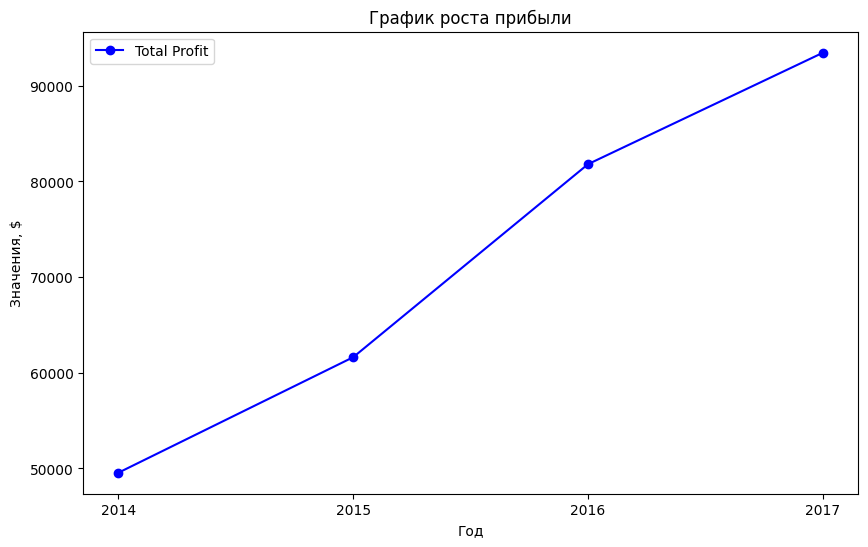

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Рисуем линию Total Profit синим цветом
plt.plot(dynamic.index, dynamic['Total Profit'], marker='o', color='blue', label='Total Profit')

# Добавление подписей
plt.title("График роста прибыли")
plt.xlabel("Год")
plt.ylabel("Значения, $")

# Установка целых чисел для оси X
plt.xticks(dynamic.index, [str(year) for year in dynamic.index])

# Добавление легенды
plt.legend()

plt.show()

In [15]:
# ЧТО МЫ ВИДИМ?
# Компания активно развивается, а ее показатели стабильно растут.
# За последний год выручка компании выросла на 16,91%, а прибыль выросла на 12,46%. 
# Рост выручки за 4 года составил 51,41%, при этом рост прибыли за тот же период составил 88,6%.


In [16]:
# Группируем данные по годам и месяцам, рассчитываем общие показатели: выручку, количество проданных товаров и прибыль
df1 = df.groupby(['Year','Month']).agg({
    'Sales': 'sum',    # Общая выручка
    'Quantity': 'sum', # Общее количество проданных товаров
    'Profit': 'sum'    # Общая прибыль
}).rename(columns={
    'Sales': 'Total Sales',
    'Quantity': 'Total Quantity',
    'Profit': 'Total Profit'
})

# Создаем сдвинутые на один период столбцы для расчета динамики
df1['S_shifted'] = df1['Total Sales'].shift(1)
df1['Q_shifted'] = df1['Total Quantity'].shift(1)
df1['P_shifted'] = df1['Total Profit'].shift(1)

# Рассчитываем динамику изменений показателей в процентах
df1['Sales Dynamic'] = ((df1['Total Sales'] - df1['S_shifted']) / df1['Total Sales'])*100
df1['Quantity Dynamic'] = ((df1['Total Quantity'] - df1['Q_shifted']) / df1['Total Quantity'])*100
df1['Profit Dynamic'] = ((df1['Total Profit'] - df1['P_shifted']) / df1['Total Profit'])*100

# Формируем таблицу с динамикой выручки по месяцам
month_dynamic = df1.loc[:,['Total Sales','Sales Dynamic']]
month_dynamic

Total Sales  Sales Dynamic
Year Month                            
2014 1         14236.90            NaN
     2          4519.89        -214.98
     3         55691.01          91.88
     4         28295.35         -96.82
     5         23648.29         -19.65
     6         34595.13          31.64
     7         33946.39          -1.91
     8         27909.47         -21.63
     9         81777.35          65.87
     10        31453.39        -160.00
     11        78628.72          60.00
     12        69545.62         -13.06
2015 1         18174.08        -282.66
     2         11951.41         -52.07
     3         38726.25          69.14
     4         34195.21         -13.25
     5         30131.69         -13.49
     6         24797.29         -21.51
     7         28765.33          13.79
     8         36898.33          22.04
     9         64595.92          42.88
     10        31404.92        -105.69
     11        75972.56          58.66
     12        74919.52          -1.41
2016 1         18542.49        -304.04
     2         22978.82          19.31
     3         51715.88          55.57
     4         38750.04         -33.46
     5         56987.73          32.00
     6         40344.53         -41.25
     7         39261.96          -2.76
     8         31115.37         -26.18
     9         73410.02          57.61
     10        59687.75         -22.99
     11        79411.97          24.84
     12        96999.04          18.13
2017 1         43971.37        -120.60
     2         20301.13        -116.60
     3         58872.35          65.52
     4         36521.54         -61.20
     5         44261.11          17.49
     6         52981.73          16.46
     7         45264.42         -17.05
     8         63120.89          28.29
     9         87866.65          28.16
     10        77776.92         -12.97
     11       118447.82          34.34
     12        83829.32         -41.30

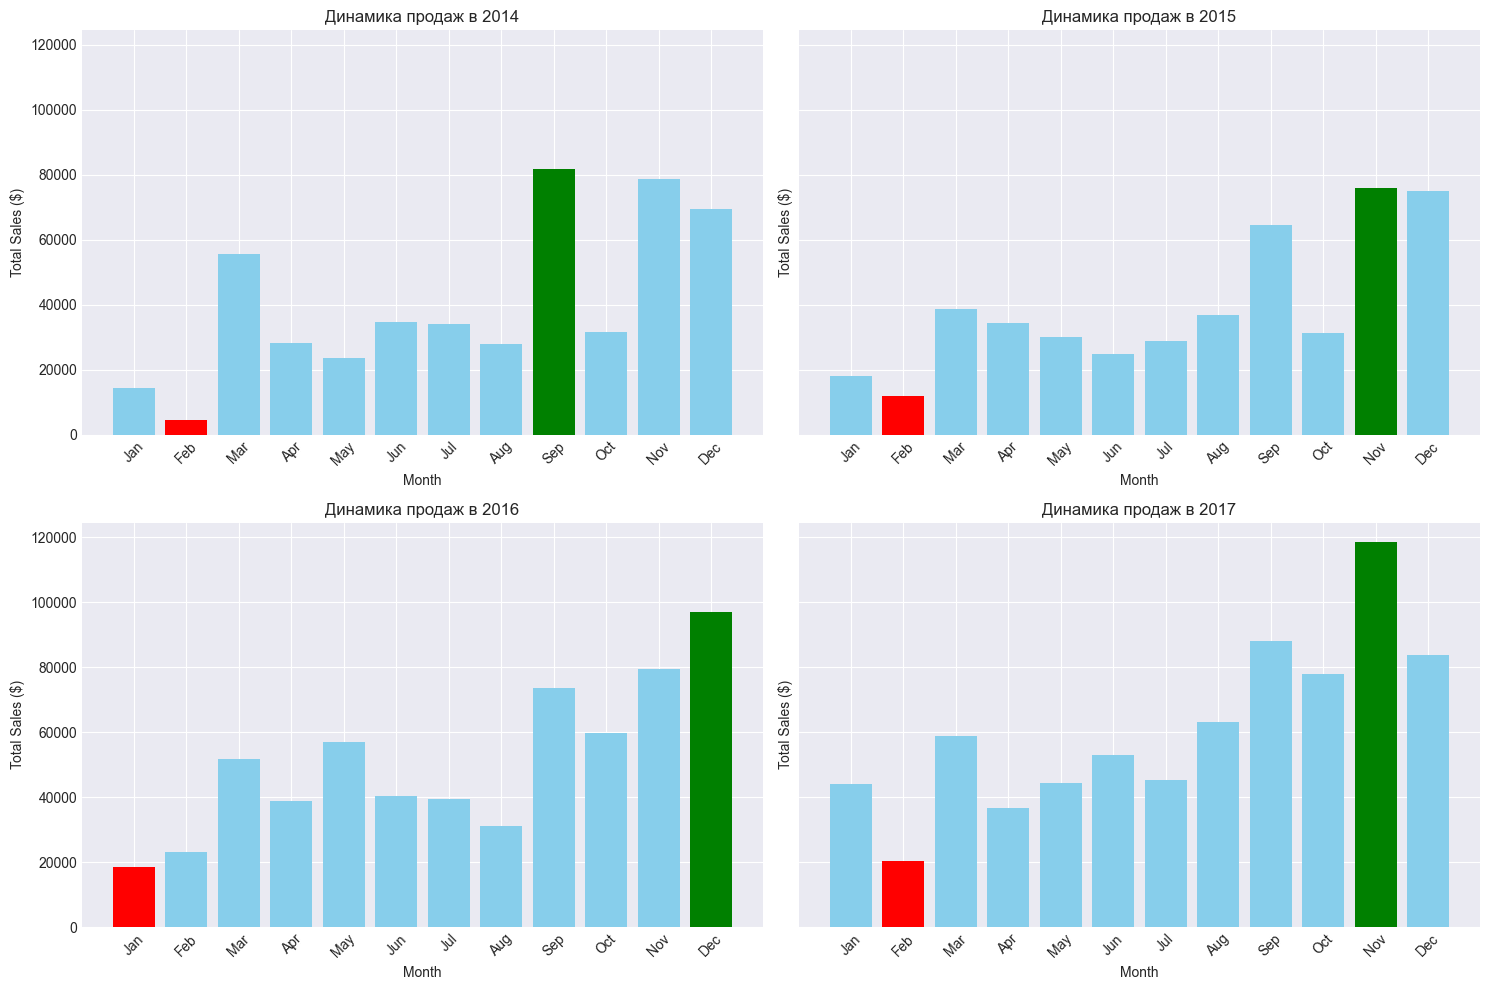

In [17]:
import calendar

# Сбрасываем индексы для правильного отображения данных
df1 = df1.reset_index()

# Преобразуем столбец 'Month' в числовой формат
df1['Month'] = pd.to_numeric(df1['Month'], errors='coerce').astype(int)

# Устанавливаем стиль для графиков
plt.style.use('seaborn-v0_8-darkgrid')

# Создаем фигуру и сетку подграфиков
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

# Преобразуем массив осей для удобства итерации
axs = axs.flatten()

# Получаем уникальные годы
years = df1['Year'].unique()

# Строим графики для каждого года
for i, year in enumerate(years):
    # Фильтруем DataFrame по текущему году
    df_year = df1[df1['Year'] == year]

    # Находим максимальные и минимальные значения продаж за год
    max_sales = df_year['Total Sales'].max()
    min_sales = df_year['Total Sales'].min()

    # Используем разные цвета для баров с максимальными и минимальными значениями
    colors = ['red' if val == min_sales else 'green' if val == max_sales else 'skyblue' for val in df_year['Total Sales']]

    # Построение столбчатой диаграммы - используем 'Month' для значений по оси X
    axs[i].bar(df_year['Month'], df_year['Total Sales'], color=colors, align='center')

    # Устанавливаем заголовок и подписи к осям
    axs[i].set_title(f'Динамика продаж в {year}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Total Sales ($)')

    # Устанавливаем месяцы на ось X с помощью модуля calendar и выравниваем их
    axs[i].set_xticks(df_year['Month'])  # Используем фактические номера месяцев для x-ticks
    axs[i].set_xticklabels([calendar.month_abbr[m] for m in df_year['Month']], rotation=45)

# Настраиваем макет для лучшего отображения
plt.tight_layout()

plt.show()

In [18]:
#ЧТО МЫ ВИДИМ?
# Видно, что за последние 4 года худшим месяц по продажам - февраль (лишь в 2016г худшим был январь). Это нормально, так как февраль и март по статистике всегда показывают самые маленькие продажи в E-commerce.
# Лучшими месяцами дважды были ноябрь, один раз декабрь и один раз сентябрь (в далеком 2014г). По статистике самыми прибыльными месяцами для E-comm являются ноябрь и декабрь в связи с большим количеством акций и распродаж, таких как кибер-понедельник, черная пятница, а также Новый год/Рождество.
# По статистике январь также считается неплохим месяцем по продажам, так как многие продавцы активно распродают прошлогодний товар. Глядя на наши отчеты по продажам, январь всегда фигурирует либо как последний месяц, либо как предпоследний. За последний год выручка за январь выросла более чем в два раза, при этом незначительно сократилось кол-во продаж в феврале, что определенно хорошо для компании.

In [19]:
#Для начала рассмотрим рост показателей по годам. Нас интересует общая выручка, общее кол-во проданных товаров и общая прибыль.

# Группируем данные по годам и категориям, вычисляя общую выручку, количество проданных товаров и общую прибыль
df1 = df.groupby(['Year','Category']).agg({
    'Sales': 'sum',    # Общая выручка
    'Quantity': 'sum', # Общее количество проданных товаров
    'Profit': 'sum'    # Общая прибыль
}).rename(columns={
    'Sales': 'Total Sales',
    'Quantity': 'Total Quantity',
    'Profit': 'Total Profit'
})

# Рассчитываем процент прибыли для каждой категории в пределах каждого года
df1['% of Profit by year'] = df1['Total Profit'] / df1.groupby('Year')['Total Profit'].transform('sum') * 100

# Ограничиваем вывод количества строк для просмотра, чтобы отображать до 20 строк
pd.set_option('display.max_rows', 20)


# Сортируем данные по годам и проценту прибыли по убыванию
df1_sorted = df1.sort_values(by=['Year', '% of Profit by year'], ascending=[True, False])

# Снимаем ограничение
pd.set_option('display.max_rows', None)
df1_sorted


Total Sales  Total Quantity  Total Profit  \
Year Category                                                     
2014 Office Supplies    151776.41            4569      22593.42   
     Technology         175278.23            1389      21492.83   
     Furniture          157192.85            1623       5457.73   
2015 Technology         162780.81            1489      33503.87   
     Office Supplies    137233.46            4715      25099.53   
     Furniture          170518.24            1775       3015.20   
2016 Technology         226364.18            1698      39773.99   
     Office Supplies    183939.98            5946      35061.23   
     Furniture          198901.44            2193       6959.95   
2017 Technology         271730.81            2363      50684.26   
     Office Supplies    246097.17            7676      39736.62   
     Furniture          215387.27            2437       3018.39   

                      % of Profit by year  
Year Category                              
2014 Office Supplies                45.60  
     Technology                     43.38  
     Furniture                      11.02  
2015 Technology                     54.37  
     Office Supplies                40.73  
     Furniture                       4.89  
2016 Technology                     48.63  
     Office Supplies                42.86  
     Furniture                       8.51  
2017 Technology                     54.24  
     Office Supplies                42.53  
     Furniture                       3.23

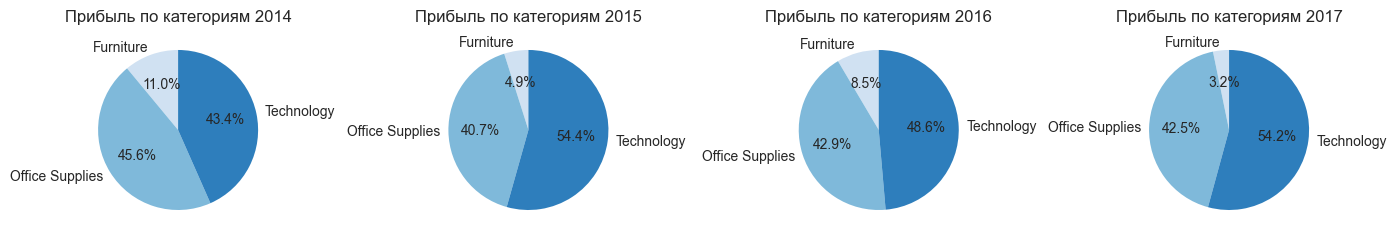

In [20]:
# Группируем данные по годам и категориям, суммируя проценты прибыли по категориям за каждый год
grouped = df1_sorted.groupby(['Year', 'Category'])['% of Profit by year'].sum()

# Сбрасываем индекс, чтобы преобразовать MultiIndex в обычный DataFrame
df1_sorted = df1_sorted.reset_index()

# Получаем уникальные значения годов из данных
years = df1_sorted['Year'].unique()

# Определяем цветовую схему для категорий, используя градиент синего цвета
colors = plt.cm.Blues(np.linspace(0.2, 0.7, len(df1_sorted['Category'].unique())))

# Создаем подграфики для каждого года
fig, axes = plt.subplots(1, len(years), figsize=(14, 7))

# Строим круговые диаграммы для каждого года
for ax, year in zip(axes, years):
    # Извлекаем данные для текущего года
    year_data = grouped.loc[year]
    # Создаем круговую диаграмму
    ax.pie(year_data, labels=year_data.index, autopct='%1.1f%%', startangle=90, colors=colors)
    # Устанавливаем заголовок
    ax.set_title(f'Прибыль по категориям {year}')

# Улучшаем размещение графиков
plt.tight_layout()
plt.show()

In [21]:
# ЧТО МЫ ВИДИМ?
# Последовательно снижается доля категории Furniture и увеличиваются две другие. Если Office Supply осталась примерно на том же уровне, что и в 2016 году, то категория Technology выросла на 5,6%

In [22]:
# Группируем данные по годам и подкатегориям, вычисляя общую выручку, количество проданных товаров и общую прибыль
df2 = df.groupby(['Year', 'Sub-Category']).agg({
    'Sales': 'sum',    # Суммируем продажи
    'Quantity': 'sum', # Суммируем количество проданных товаров
    'Profit': 'sum'    # Суммируем прибыль
}).rename(columns={
    'Sales': 'Total Sales',
    'Quantity': 'Total Quantity',
    'Profit': 'Total Profit'
})

# Рассчитываем процент прибыли для каждой подкатегории в пределах каждого года
df2['% of Profit by year'] = df2['Total Profit'] / df2.groupby('Year')['Total Profit'].transform('sum') * 100

# Ограничиваем вывод количества строк для просмотра, чтобы отображать до 20 строк
pd.set_option('display.max_rows', 20)

# Сортируем данные по годам и проценту прибыли по убыванию
df2_sorted = df2.sort_values(by=['Year', '% of Profit by year'], ascending=[True, False])

# Снимаем ограничение
pd.set_option('display.max_rows', 20)
df2_sorted 

Total Sales  Total Quantity  Total Profit  \
Year Sub-Category                                              
2014 Phones           77390.81             684      11808.01   
     Chairs           77241.58             540       6955.05   
     Accessories      25014.27             580       6402.72   
     Paper            14834.96            1017       6371.02   
     Binders          43488.26            1089       4739.72   
...                        ...             ...           ...   
2017 Fasteners          857.59             249        304.95   
     Bookcases        30024.28             276       -583.63   
     Supplies         16049.41             192       -955.31   
     Machines         43544.68             121      -2869.22   
     Tables           60893.54             390      -8140.69   

                   % of Profit by year  
Year Sub-Category                       
2014 Phones                      23.83  
     Chairs                      14.04  
     Accessories                 12.92  
     Paper                       12.86  
     Binders                      9.57  
...                                ...  
2017 Fasteners                    0.33  
     Bookcases                   -0.62  
     Supplies                    -1.02  
     Machines                    -3.07  
     Tables                      -8.71  

[68 rows x 4 columns]

C:\Users\Егор\AppData\Local\Temp\ipykernel_15072\1961348408.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Егор\AppData\Local\Temp\ipykernel_15072\1961348408.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


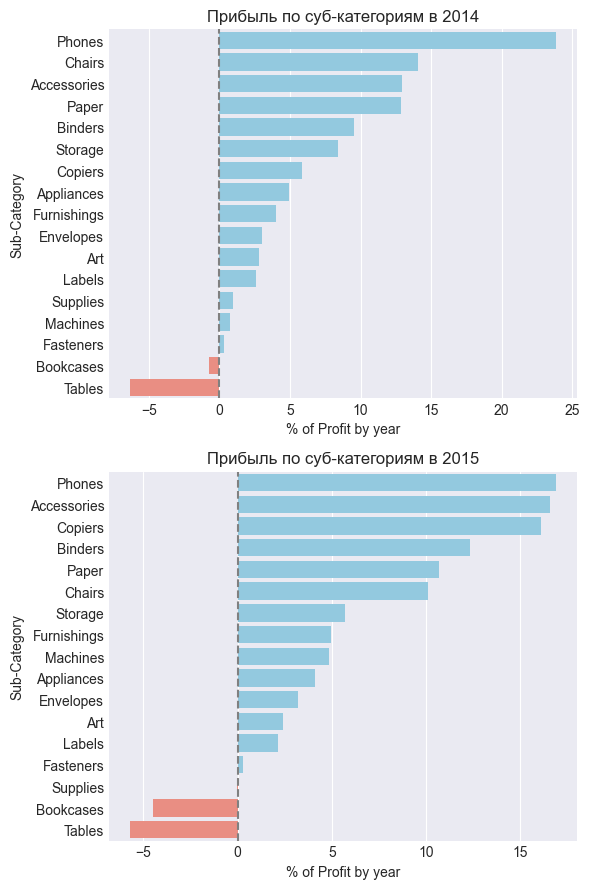

C:\Users\Егор\AppData\Local\Temp\ipykernel_15072\1961348408.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Егор\AppData\Local\Temp\ipykernel_15072\1961348408.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


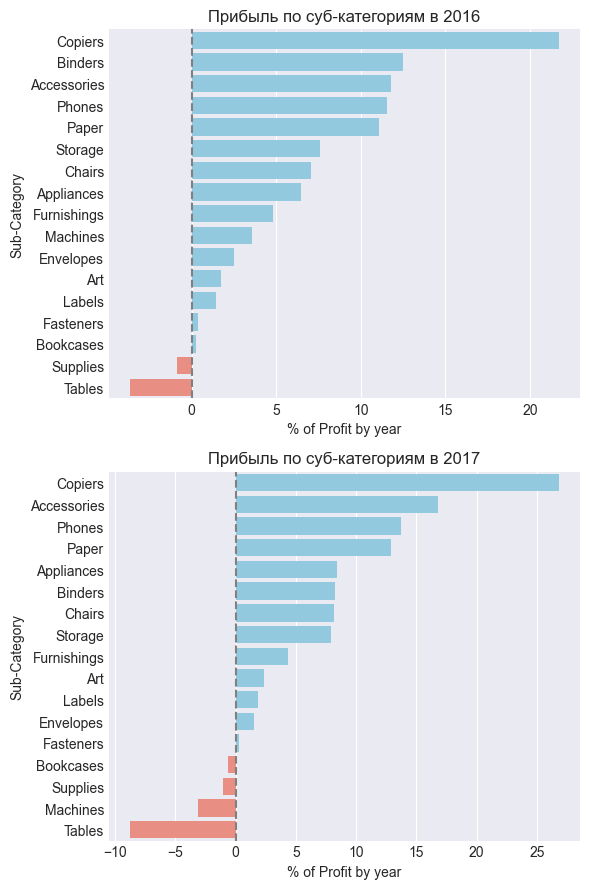

In [23]:
import seaborn as sns

# Сбрасываем индексы для преобразования MultiIndex в обычный DataFrame
df2_sorted = df2_sorted.reset_index()

# Определяем функцию для логики окрашивания столбцов
def color_logic(value):
    if value > 0:
        return 'skyblue'
    else:
        return 'salmon'

# Получаем уникальные года и сортируем их, чтобы они были в порядке
unique_years = sorted(df2_sorted['Year'].unique())

# Создаем фигуру с подграфиками - 2 диаграммы на страницу
for i in range(0, len(unique_years), 2):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))  # Adjust the size as needed
    
    # Цикл по диапазону лет, но остановимся, если годы закончатся
    for j in range(2):
        if i + j >= len(unique_years):
            break
        year = unique_years[i + j]
        ax = axes[j]

        # Фильтруем данные для текущего года
        year_data = df2_sorted[df2_sorted['Year'] == year]
        
        # Сортируем по '% of Profit by year' для построения дивергентных столбцов
        year_data = year_data.sort_values('% of Profit by year', ascending=False)
        
        # Устанавливаем логику окрашивания столбцов
        bar_colors = [color_logic(x) for x in year_data['% of Profit by year']]
        
        # Создаем барплот на соответствующем подграфике
        sns.barplot(
            x='% of Profit by year',
            y='Sub-Category',
            data=year_data,
            palette=bar_colors,
            ax=ax
        )
        
        # Добавляем линию на уровне x=0
        ax.axvline(0, color='grey', linewidth=1.5, linestyle='--')

        # Устанавливаем заголовок и метки
        ax.set_title(f'Прибыль по суб-категориям в {year}')
        ax.set_xlabel('% of Profit by year')
        ax.set_ylabel('Sub-Category')

    # Настраиваем макет для улучшения читаемости
    plt.tight_layout()
    plt.show()

In [ ]:
#ВЫВОДЫ:
# Несмотря на ежегодный рост прибыли компании, растет и количество убыточных суб-категорий. 4 года к ряду суб-категория Tables показывает убыток; Суб-категория Bookcases лишь в 2016 году не принесла компании убыток; Суб-категория Supplies второй год подряд приносит компании убытки, а суб-категория Machines, некогда входившая в топ 10 по объемам прибыли, в 2017 так же продемонстрировала убыток.
# Необходимо подробно изучить каждую убыточную суб-категорию, определить причины, по которым данные товары нерентабельны. Далее избавиться от наиболее убыточных, что приведет к росту прибыли компании примерно на 14%

In [24]:
# Группируем данные по годам и названиям продуктов, вычисляя общую выручку, количество проданных товаров и общую прибыль
df3 = df.groupby(['Year', 'Product Name']).agg({
    'Sales': 'sum',    # Суммируем продажи
    'Quantity': 'sum', # Суммируем количество проданных товаров
    'Profit': 'sum'    # Суммируем прибыль
}).rename(columns={
    'Sales': 'Total Sales',
    'Quantity': 'Total Quantity',
    'Profit': 'Total Profit'
})

# Сортируем данные по годам, затем по общей выручке, количеству проданных товаров и общей прибыли в порядке убывания 
df3 = df3.sort_values(by=['Year','Total Sales','Total Quantity','Total Profit'], ascending=[True,False,False,False])
df3

Total Sales  \
Year Product Name                                                      
2014 Cisco TelePresence System EX90 Videoconferencin...     22638.48   
     Lexmark MX611dhe Monochrome Laser Printer              11219.93   
     HP Designjet T520 Inkjet Large Format Printer -...      9624.94   
     Ibico EPK-21 Electric Binding System                    9449.95   
     High Speed Automatic Electric Letter Opener             8187.65   
...                                                              ...   
2017 Avery Hidden Tab Dividers for Binding Systems              1.79   
     Computer Printout Index Tabs                               1.68   
     Eureka Disposable Bags for Sanitaire Vibra Groo...         1.62   
     Self-Adhesive Ring Binder Labels                           1.41   
     Hoover Commercial Lightweight Upright Vacuum               1.39   

                                                         Total Quantity  \
Year Product Name                                                         
2014 Cisco TelePresence System EX90 Videoconferencin...               6   
     Lexmark MX611dhe Monochrome Laser Printer                       11   
     HP Designjet T520 Inkjet Large Format Printer -...               7   
     Ibico EPK-21 Electric Binding System                             5   
     High Speed Automatic Electric Letter Opener                      5   
...                                                                 ...   
2017 Avery Hidden Tab Dividers for Binding Systems                    3   
     Computer Printout Index Tabs                                     5   
     Eureka Disposable Bags for Sanitaire Vibra Groo...               2   
     Self-Adhesive Ring Binder Labels                                 2   
     Hoover Commercial Lightweight Upright Vacuum                     2   

                                                         Total Profit  
Year Product Name                                                      
2014 Cisco TelePresence System EX90 Videoconferencin...      -1811.08  
     Lexmark MX611dhe Monochrome Laser Printer               -1869.99  
     HP Designjet T520 Inkjet Large Format Printer -...       1294.99  
     Ibico EPK-21 Electric Binding System                     4630.48  
     High Speed Automatic Electric Letter Opener               327.51  
...                                                               ...  
2017 Avery Hidden Tab Dividers for Binding Systems              -3.04  
     Computer Printout Index Tabs                               -2.69  
     Eureka Disposable Bags for Sanitaire Vibra Groo...         -4.47  
     Self-Adhesive Ring Binder Labels                           -2.32  
     Hoover Commercial Lightweight Upright Vacuum               -3.76  

[5327 rows x 3 columns]

In [25]:
# Вычисляем кумулятивные продажи, количество и прибыль по годам
df3['Cumulative Sales'] = df3.groupby('Year')['Total Sales'].cumsum()
df3['Cumulative Quantity'] = df3.groupby('Year')['Total Quantity'].cumsum()
df3['Cumulative Profit'] = df3.groupby('Year')['Total Profit'].cumsum()

# Вычисляем общие суммы продаж, количества и прибыли по каждому году
total_by_year = df3.groupby('Year').agg({
    'Total Sales': 'sum',
    'Total Quantity': 'sum',
    'Total Profit': 'sum'
})

# Присоединяем общие суммы к основному DataFrame, используя год как ключ 
df3 = df3.join(total_by_year, on='Year', rsuffix='_total')

# Рассчитываем процентные значения для кумулятивных сумм
df3['% Sales'] = df3['Cumulative Sales'] / df3['Total Sales_total']
df3['% Quantity'] = df3['Cumulative Quantity'] / df3['Total Quantity_total']
df3['% Profit'] = df3['Cumulative Profit'] / df3['Total Profit_total']

# Сортируем данные по годам и проценту кумулятивных продаж в порядке возрастания
df3 = df3.sort_values(by=['Year','% Sales'], ascending = [True,True])
df3

Total Sales  \
Year Product Name                                                      
2014 Cisco TelePresence System EX90 Videoconferencin...     22638.48   
     Lexmark MX611dhe Monochrome Laser Printer              11219.93   
     HP Designjet T520 Inkjet Large Format Printer -...      9624.94   
     Ibico EPK-21 Electric Binding System                    9449.95   
     High Speed Automatic Electric Letter Opener             8187.65   
...                                                              ...   
2017 Avery Hidden Tab Dividers for Binding Systems              1.79   
     Computer Printout Index Tabs                               1.68   
     Eureka Disposable Bags for Sanitaire Vibra Groo...         1.62   
     Self-Adhesive Ring Binder Labels                           1.41   
     Hoover Commercial Lightweight Upright Vacuum               1.39   

                                                         Total Quantity  \
Year Product Name                                                         
2014 Cisco TelePresence System EX90 Videoconferencin...               6   
     Lexmark MX611dhe Monochrome Laser Printer                       11   
     HP Designjet T520 Inkjet Large Format Printer -...               7   
     Ibico EPK-21 Electric Binding System                             5   
     High Speed Automatic Electric Letter Opener                      5   
...                                                                 ...   
2017 Avery Hidden Tab Dividers for Binding Systems                    3   
     Computer Printout Index Tabs                                     5   
     Eureka Disposable Bags for Sanitaire Vibra Groo...               2   
     Self-Adhesive Ring Binder Labels                                 2   
     Hoover Commercial Lightweight Upright Vacuum                     2   

                                                         Total Profit  \
Year Product Name                                                       
2014 Cisco TelePresence System EX90 Videoconferencin...      -1811.08   
     Lexmark MX611dhe Monochrome Laser Printer               -1869.99   
     HP Designjet T520 Inkjet Large Format Printer -...       1294.99   
     Ibico EPK-21 Electric Binding System                     4630.48   
     High Speed Automatic Electric Letter Opener               327.51   
...                                                               ...   
2017 Avery Hidden Tab Dividers for Binding Systems              -3.04   
     Computer Printout Index Tabs                               -2.69   
     Eureka Disposable Bags for Sanitaire Vibra Groo...         -4.47   
     Self-Adhesive Ring Binder Labels                           -2.32   
     Hoover Commercial Lightweight Upright Vacuum               -3.76   

                                                         Cumulative Sales  \
Year Product Name                                                           
2014 Cisco TelePresence System EX90 Videoconferencin...          22638.48   
     Lexmark MX611dhe Monochrome Laser Printer                   33858.41   
     HP Designjet T520 Inkjet Large Format Printer -...          43483.36   
     Ibico EPK-21 Electric Binding System                        52933.31   
     High Speed Automatic Electric Letter Opener                 61120.96   
...                                                                   ...   
2017 Avery Hidden Tab Dividers for Binding Systems              733209.15   
     Computer Printout Index Tabs                               733210.83   
     Eureka Disposable Bags for Sanitaire Vibra Groo...         733212.46   
     Self-Adhesive Ring Binder Labels                           733213.86   
     Hoover Commercial Lightweight Upright Vacuum               733215.26   

                                                         Cumulative Quantity  \
Year Product Name                                                              
2014 Cisco TelePresence System E

In [26]:
# Сбрасываем индексы для преобразования MultiIndex в обычный DataFrame
df3 = df3.reset_index()

# Классифицируем продукты по ABC-анализу на основе процентов кумулятивных продаж
df3['ABC_sales'] = np.where(df3['% Sales']<0.80,'A',np.where(df3['% Sales']<0.95,'B','C'))

# Классифицируем продукты по ABC-анализу на основе процентов кумулятивного количества
df3['ABC_quantity'] = np.where(df3['% Quantity']<0.80,'A',np.where(df3['% Sales']<0.95,'B','C'))

# Классифицируем продукты по ABC-анализу на основе процентов кумулятивной прибыли
df3['ABC_profit'] = np.where(df3['% Profit']<0.80,'A',np.where(df3['% Sales']<0.95,'B','C'))

# Создаем DataFrame с результатами ABC-анализа
abc_product = df3.loc[:,['Year','Product Name','ABC_sales','ABC_quantity','ABC_profit']]
abc_product

,Year,Product Name,ABC_sales,ABC_quantity,ABC_profit
0,2014,Cisco TelePresence System EX90 Videoconferenci...,A,A,A
1,2014,Lexmark MX611dhe Monochrome Laser Printer,A,A,A
2,2014,HP Designjet T520 Inkjet Large Format Printer ...,A,A,A
3,2014,Ibico EPK-21 Electric Binding System,A,A,A
4,2014,High Speed Automatic Electric Letter Opener,A,A,A
...,...,...,...,...,...
5322,2017,Avery Hidden Tab Dividers for Binding Systems,C,C,C
5323,2017,Computer Printout Index Tabs,C,C,C
5324,2017,Eureka Disposable Bags for Sanitaire Vibra Gro...,C,C,C
5325,2017,Self-Adhesive Ring Binder Labels,C,C,C


In [27]:
# Классифицируем продукты на основе ABC-анализа по продажам, количеству и прибыли
abc_product['Class'] = np.where(abc_product['ABC_sales'] == 'A','A',np.where(abc_product['ABC_sales'] == 'B','B','C'))

# Добавляем классификацию по количеству к существующей классификации
abc_product['Class'] = np.where(abc_product['ABC_quantity'] == 'A', abc_product['Class']+'A',np.where(abc_product['ABC_quantity'] == 'B',abc_product['Class']+'B',abc_product['Class']+'C'))

# Добавляем классификацию по прибыли к существующей классификации
abc_product['Class'] = np.where(abc_product['ABC_profit'] == 'A', abc_product['Class']+'A',np.where(abc_product['ABC_profit'] == 'B',abc_product['Class']+'B',abc_product['Class']+'C'))

# Создаем DataFrame с годом, названием продукта и его классом на основе ABC-анализа
abc_product = abc_product.loc[:,['Year','Product Name', 'Class']]
abc_product

,Year,Product Name,Class
0,2014,Cisco TelePresence System EX90 Videoconferenci...,AAA
1,2014,Lexmark MX611dhe Monochrome Laser Printer,AAA
2,2014,HP Designjet T520 Inkjet Large Format Printer ...,AAA
3,2014,Ibico EPK-21 Electric Binding System,AAA
4,2014,High Speed Automatic Electric Letter Opener,AAA
...,...,...,...
5322,2017,Avery Hidden Tab Dividers for Binding Systems,CCC
5323,2017,Computer Printout Index Tabs,CCC
5324,2017,Eureka Disposable Bags for Sanitaire Vibra Gro...,CCC
5325,2017,Self-Adhesive Ring Binder Labels,CCC


In [28]:
# Группируем данные по годам и классам, подсчитывая общее количество для каждого класса
abc_product.groupby(['Year','Class']).count()

Product Name
Year Class              
2014 AAA             238
     BAA             106
     BAB             197
     CAC             296
     CCC             375
2015 AAA             271
     BAA              54
     BAB             260
     CAC             281
     CCC             376
2016 AAA             286
     BAA              54
     BAB             306
     CAC             305
     CCC             411
2017 AAA             327
     BAA              83
     BAB             312
     CAC             316
     CCC             473

In [29]:
#Рассмотрим каждую категорию по-отдельности:
#AAA - приоритет на товары этой категории, регулярно пересматриванем прогнозы продаж для обеспечения постоянного наличия на складе.
#BAA	- товары могут двигаться не так быстро, как товары класса AАА, однако они приносят хорошую прибыль компании. Необходимо подумать как можно увеличить кол-во продаж товаров этой категории. 
#BAB	- товары продаются в большом количестве, но при этом не приносят большую прибыль. Вероятнее всего занимают много места на складе, а потому нужно подумать об оптимизации хранения и попробовать другие методы продвижения.
#CAC	- оценить необходимость каждого товара класса, так как они могут не оправдывать затраты на хранение. Пересмотреть возможность постепенного изъятия этих товаров из ассортимента.
#CCC	- упростить ассортимент товаров, постепенно избавляться от товаров этой категории, чтобы сосредоточиться на тех, которые имеют лучший потенциал.

In [30]:
# Группируем данные по годам и подсчитываем количество продуктов в каждом году
abc_product.groupby(['Year']).agg({'Product Name':'count'})

,Product Name
Year,
2014,1212
2015,1242
2016,1362
2017,1511


In [31]:
# Группируем данные по годам и сегментам, вычисляя общую выручку, количество проданных товаров и общую прибыль
df1 = df.groupby(['Year','Segment']).agg({
    'Sales': 'sum',     # Суммируем продажи
    'Quantity': 'sum',  # Суммируем количество проданных товаров
    'Profit': 'sum'     # Суммируем прибыль
}).rename(columns={
    'Sales': 'Total Sales',
    'Quantity': 'Total Quantity',
    'Profit': 'Total Profit'
})

# Выбираем столбец "Total Sales" для дальнейшего анализа
segmentation = df1.loc[:,['Total Sales']]
segmentation

Total Sales
Year Segment                 
2014 Consumer       266096.81
     Corporate      128434.87
     Home Office     89715.81
2015 Consumer       266535.93
     Corporate      128757.31
     Home Office     75239.27
2016 Consumer       296863.90
     Corporate      207106.36
     Home Office    105235.34
2017 Consumer       331904.70
     Corporate      241847.82
     Home Office    159462.73

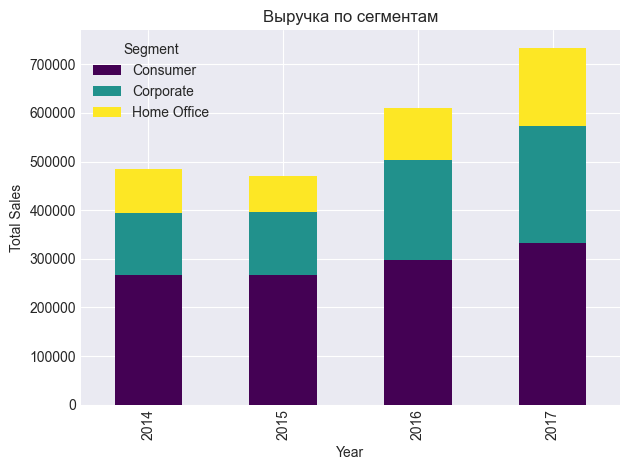

In [32]:
# Создаем сводную таблицу, где строки - это годы, столбцы - сегменты, а значения - общая выручка
segmentation_pivot = df1.pivot_table(index='Year', columns='Segment', values='Total Sales', aggfunc='sum')

# Строим столбчатую диаграмму с накоплением
segmentation_pivot.plot(kind='bar', stacked=True, colormap='viridis')

# Устанавливаем заголовок диаграммы
plt.title('Выручка по сегментам')

# Устанавливаем подпись оси-х
plt.xlabel('Year')

# Устанавливаем подпись оси-у
plt.ylabel('Total Sales')

# Создаем легенду графика
plt.legend(title='Segment')

# Настраиваем макет для улучшения читаемости
plt.tight_layout()
plt.show()

In [33]:
#Доминирующим остается сегмент Consumer, однако за последний год больший рост показали два других сегмента. Нужно активнее заниматься развитием этих двух сегментов, что позволит компании диверсифицировать риски и увеличить прибыль. 

In [34]:
# Группируем данные по годам и регионам, вычисляя общую выручку, количество проданных товаров и общую прибыль
df1 = df.groupby(['Year','Region']).agg({
    'Sales': 'sum',    # Суммируем продажи
    'Quantity': 'sum', # Суммируем количество проданных товаров
    'Profit': 'sum'    # Суммируем прибыль
}).rename(columns={
    'Sales': 'Total Sales',
    'Quantity': 'Total Quantity',
    'Profit': 'Total Profit'
})

# Выбираем столбец "Total Sales" для дальнейшего анализа
region = df1.loc[:,['Total Sales']]
region

Total Sales
Year Region              
2014 Central    103838.16
     East       128680.46
     South      103845.84
     West       147883.03
2015 Central    102874.22
     East       156332.06
     South       71359.98
     West       139966.25
2016 Central    147429.38
     East       180685.82
     South       93610.22
     West       187480.18
2017 Central    147098.13
     East       213082.90
     South      122905.86
     West       250128.37

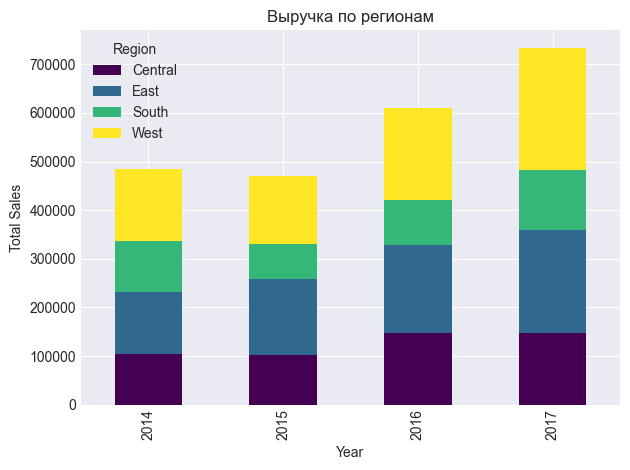

In [35]:
# Создаем сводную таблицу, где строки - это годы, столбцы - регионы, а значения - общая выручка
region_pivot = df1.pivot_table(index='Year', columns='Region', values='Total Sales', aggfunc='sum')

# Строим столбчатую диаграмму с накоплением
region_pivot.plot(kind='bar', stacked=True, colormap='viridis')

# Устанавливаем заголовок диаграммы
plt.title('Выручка по регионам')

# Устанавливаем подпись оси-х
plt.xlabel('Year')

# Устанавливаем подпись оси-у
plt.ylabel('Total Sales')

# Создаем легенду графика
plt.legend(title='Region')

# Настраиваем макет
plt.tight_layout()
plt.show()

In [36]:
# Наибольший рост за год продемонстрировал Западный регион. Нужно провести более глубокий анализ продаж центрального региона, для выявления причин отсутствия роста за последний год.

In [37]:
# Группируем данные по годам и штатам, вычисляя общую выручку, количество проданных товаров и общую прибыль
df1 = df.groupby(['Year','State']).agg({
    'Sales': 'sum',    # Суммируем продажи
    'Quantity': 'sum', # Суммируем количество проданных товаров
    'Profit': 'sum'    # Суммируем прибыль
}).rename(columns={
    'Sales': 'Total Sales',
    'Quantity': 'Total Quantity',
    'Profit': 'Total Profit'
})

# Выбираем столбец "Total Sales" для дальнейшего анализа
state = df1.loc[:,['Total Sales']]

# Устанавливаем параметр отображения для вывода всех строк (до 181 строки)
pd.set_option('display.max_rows',181)
state

Total Sales
Year State                            
2014 Alabama                   6139.09
     Arizona                   8295.24
     Arkansas                  6302.69
     California               91303.53
     Colorado                  6502.29
     Connecticut               2794.02
     Delaware                  4786.03
     Florida                  34248.26
     Georgia                   4540.10
     Idaho                      465.22
     Illinois                 16202.71
     Indiana                   2936.81
     Iowa                      1190.84
     Kansas                    1319.79
     Kentucky                  8280.46
     Louisiana                 2534.92
     Maine                      617.12
     Maryland                  1701.25
     Massachusetts             9900.11
     Michigan                  6172.25
     Minnesota                15883.33
     Mississippi               2055.16
     Missouri                  1648.03
     Montana                    424.49
     Nebraska                   210.02
     Nevada                    2561.21
     New Hampshire              504.48
     New Jersey                4192.28
     New Mexico                 708.01
     New York                 64788.49
     North Carolina            8620.74
     Ohio                     14134.85
     Oklahoma                  2639.35
     Oregon                    4807.78
     Pennsylvania             20246.15
     Rhode Island              5015.69
     South Carolina            2270.86
     South Dakota               162.15
     Tennessee                 3051.51
     Texas                    50625.18
     Utah                      2943.69
     Virginia                 25802.05
     Washington               29871.58
     Wisconsin                 4847.71
2015 Alabama                   3891.97
     Arizona                   9611.21
     Arkansas                   443.61
     California               88443.84
     Colorado                  4639.27
     Connecticut               1284.64
     Delaware                  6190.34
     District of Columbia      2670.19
     Florida                  15177.45
     Georgia                  11338.05
     Idaho                     1500.24
     Illinois                 18578.06
     Indiana                   6640.32
     Iowa                      1713.20
     Kansas                     170.31
     Kentucky                  7673.56
     Louisiana                  917.80
     Maine                      106.08
     Maryland                  7843.11
     Massachusetts             6625.99
     Michigan                 16843.68
     Minnesota                 5724.19
     Mississippi                302.16
     Missouri                  6985.21
     Montana                    935.58
     Nebraska                   594.14
     Nevada                    1948.46
     New Hampshire             4345.03
     New Jersey                4105.09
     New Mexico                1192.87
     New York                 80320.69
     North Carolina            8558.30
     Ohio                     16110.43
     Oklahoma                  2808.34
     Oregon                    4285.94
     Pennsylvania             20510.82
     Rhode Island              1099.56
     South Carolina            4147.62
     Tennessee                 8366.04
     Texas                    34454.96
     Utah                      3993.32
     Vermont                   5120.10
     Virginia                 10543.42
     Washington               23415.51
     Wisconsin                 8361.81
2016 Alabama                   7651.33
     Arizona                   6242.02
     Arkansas                  2224.19
     California              131551.91
     Colorado                 10666.74
     Connecticut               3998.49
     Delaware                  2719.72
     District of Columbia       117.07
     Florida                  13603.28
     Georgia                  14057.67
     Idaho                     1183.49
     Illinois                 21033.72
     India

In [38]:
state = state.reset_index()


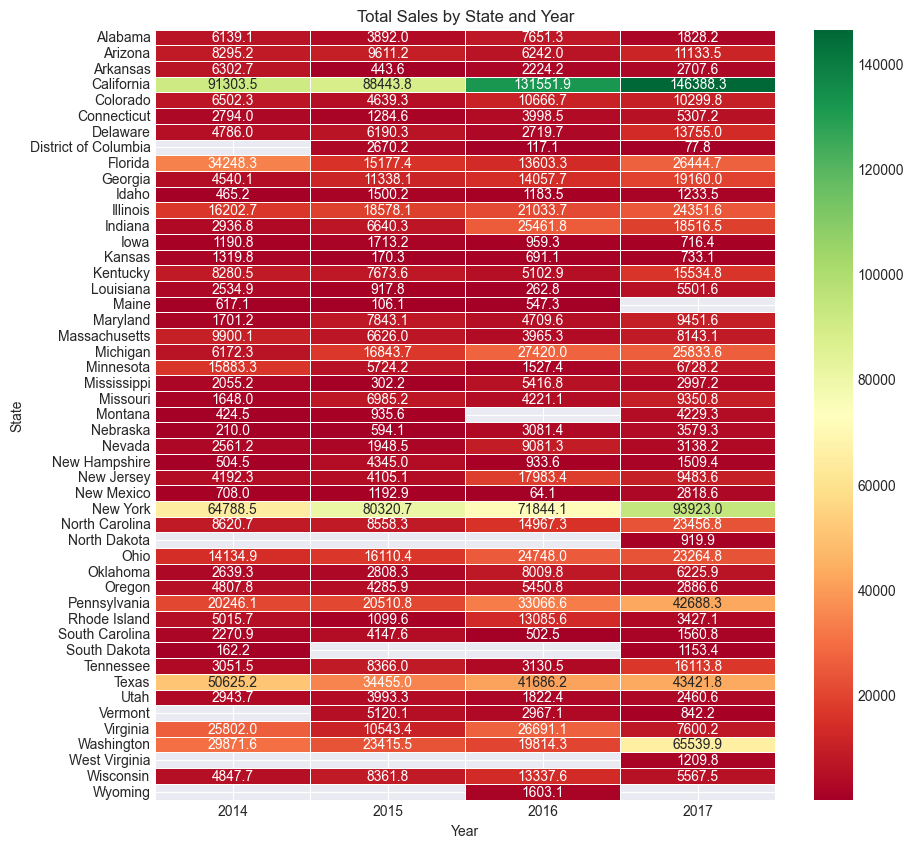

In [39]:
# Создаем сводную таблицу, где строки - это штаты, столбцы - годы, а значения - общая выручка
pivot_table = state.pivot(index="State", columns="Year", values="Total Sales")

# Создаем тепловую карту с использованием библиотеки seaborn
plt.figure(figsize=(10, 10)) 

# Создаем тепловую карту с аннотацией, использованием формата ".1f" и цветовой схемой "RdYlGn"
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="RdYlGn", linewidths=.5)

# Устанавливаем заголовок тепловой карты
plt.title('Total Sales by State and Year')
plt.show()

In [40]:
# В результате анализа были выполнены следующие задачи:
# Произведена очистка данных
# Рассмотрен рост показателей по годам
# Построены графики динамики продаж за каждый год по месяцам
# Построены диаграммы распределения прибыли за каждый год по категориям
# Построены графики динамики прибьыли за каждый год по суб-категориям
# Произведена классификация продуктов на основе ABC-анализа по продажам, количеству и прибыли
# Построены графики динамики выручки за каждый год по сегментам
# Построены графики динамики выручки за каждый год по регионам
# Создана тепловая карта, которая наглядно отражает количество продаж за каждый год по регионам

# ВЫВОДЫ:
# Компания активно развивается, а ее показатели растут. Рост выручки за 4 года составил 51,41%, при этом рост прибыли за тот же период составил 88,6%.
# Самые слабые месяцы по продажам - первые два месяца года (январь-февраль), а самые сильные - последние два (ноябрь, декабрь).
# Несмотря на ежегодный рост прибыли компании, растет и количество убыточных суб-категорий (4 суб-категории в 2017 году). 


# РЕКОМЕНДАЦИИ:
# Необходимо подробно рассмотреть каждую суб-категорию, проанализировать причины, по которым товары не приносят прибыль и избавиться от убыточных суб-категорий. По примерным оценкам при правильной работе с убыточными суб-категориями прибыль компании вырастет на 14%. 
# Нужно активнее заниматься развитием сегментов Corporate и Home Office, что позволит компании диверсифицировать риски и увеличить прибыль. 
# Компании необходимо сфокусировать свое внимание на товарах категории AAA, подумать как можно увеличить кол-во продаж товаров категории BAA, подумать об оптимизации хранения и попробовать другие методы продвижения товаров категории BAB, оценить необходимость каждого товара класса CAC, постепенно избавляться от товаров CCC
